In [62]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.cluster import KMeans

In [5]:
X_, Y_ = np.s_[:,0], np.s_[:,1]

In [2]:
df = pd.read_csv('data_for_gmm.csv')
df.head()

,x,y,Class
0,0.359955,0.905790,C1
1,0.333131,0.896499,C1
2,0.355769,0.879772,C1
3,0.340103,0.908589,C1
4,0.352423,0.880319,C1


In [3]:
warnings.filterwarnings('ignore')
examples = df[['x', 'y']][2:].convert_objects(convert_numeric=True).to_numpy()

In [4]:
labels = df['Class'][2:].to_numpy()
labels[np.where(labels == 'C1')[0]] = 0
labels[np.where(labels == 'C2')[0]] = 1
labels[np.where(labels == 'C3')[0]] = 2
labels[np.where(labels == 'C4')[0]] = 3

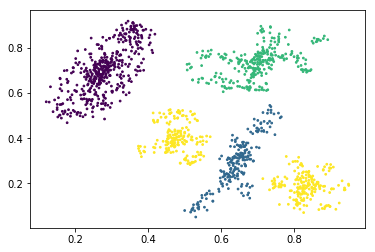

In [10]:
plt.scatter(examples[X_], examples[Y_], c=labels, s=3)
plt.show()

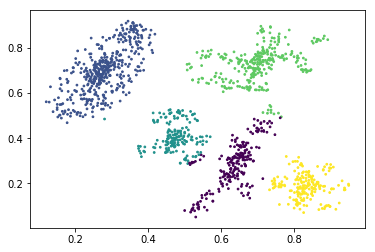

In [68]:
plt.scatter(examples[X_], examples[Y_], c=kmeans.predict(examples), s=3)
plt.show()

In [165]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='full', n_init=5) 
# by default, init_params='kmeans', see below
# increase n_init increases kmeans performance
clf.fit(examples)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=5, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [166]:
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
XXS, YYS = np.meshgrid(X, Y)
grid = np.hstack([XXS.flatten().reshape(-1, 1), YYS.flatten().reshape(-1, 1)])
grid_values = np.argmax(clf.predict_proba(grid), axis=1)
# the posterior probabilities computed by clf.predict_proba(grid) are normalized

In [167]:
labels = np.argmax(clf.predict_proba(examples), axis=1)

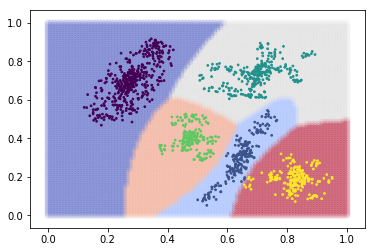

In [168]:
plt.scatter(grid[X_], grid[Y_], c=grid_values, cmap='coolwarm', alpha=0.1)
plt.scatter(examples[X_], examples[Y_], c=labels, s=3)
plt.show()